### Лабораторная работа

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [2]:
raw_df = pd.read_csv('data.csv', delimiter=';')
with pd.option_context("display.max_rows", raw_df.shape[1]):
    display(raw_df.head(10).T)

,0,1,2,3,4,5,6,7,8,9
Id,1,2,3,4,5,6,7,8,9,10
MSSubClass,60,20,60,70,60,50,20,60,50,190
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
target = 'SaleCategory'

In [5]:
cols_to_drop = []
for col in raw_df.columns:
    if len(raw_df[col][raw_df[col].isnull()])>0.1*len(raw_df):
        cols_to_drop.append(col)

In [6]:
cols_to_drop

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
raw_df.drop(cols_to_drop, inplace=True, axis=1)

In [8]:
not_full_colls = []
for col in raw_df.columns:
    if len(raw_df[col][raw_df[col].isnull()])>0:
        not_full_colls.append(col)

In [9]:
raw_df[not_full_colls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(2), object(11)
memory usage: 148.4+ KB


In [10]:
raw_df[not_full_colls].head().T

,0,1,2,3,4
MasVnrType,BrkFace,None,BrkFace,None,BrkFace
MasVnrArea,196,0,162,0,350
BsmtQual,Gd,Gd,Gd,TA,Gd
BsmtCond,TA,TA,TA,Gd,TA
BsmtExposure,No,Gd,Mn,No,Av
BsmtFinType1,GLQ,ALQ,GLQ,ALQ,GLQ
BsmtFinType2,Unf,Unf,Unf,Unf,Unf
Electrical,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr
GarageType,Attchd,Attchd,Attchd,Detchd,Attchd
GarageYrBlt,2003,1976,2001,1998,2000


Среди неполных признаков - все, кроме двух категориальные

In [11]:
mean_MasVnrArea = np.round(raw_df['MasVnrArea'].mean(), 0)
median_GarageYrBlt = np.round(raw_df['GarageYrBlt'].median(), 0)

In [12]:
mean_MasVnrArea, median_GarageYrBlt 

(104.0, 1980.0)

In [13]:
raw_df['MasVnrArea'].fillna(mean_MasVnrArea, inplace=True)
raw_df['GarageYrBlt'].fillna(median_GarageYrBlt, inplace=True)

In [14]:
for col in not_full_colls:
    raw_df[col].fillna(col + '_other', inplace=True)

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
# Создадим стратифицированную выборку обучающего и тестового набора

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, 
                               random_state=42)
for train_index, test_index in split.split(raw_df, raw_df[target]):
    train_df = raw_df.iloc[train_index]
    test_df = raw_df.iloc[test_index]

In [18]:
train_df.shape, test_df.shape

((1168, 75), (292, 75))

In [19]:
cat_columns = []
num_columns = []
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

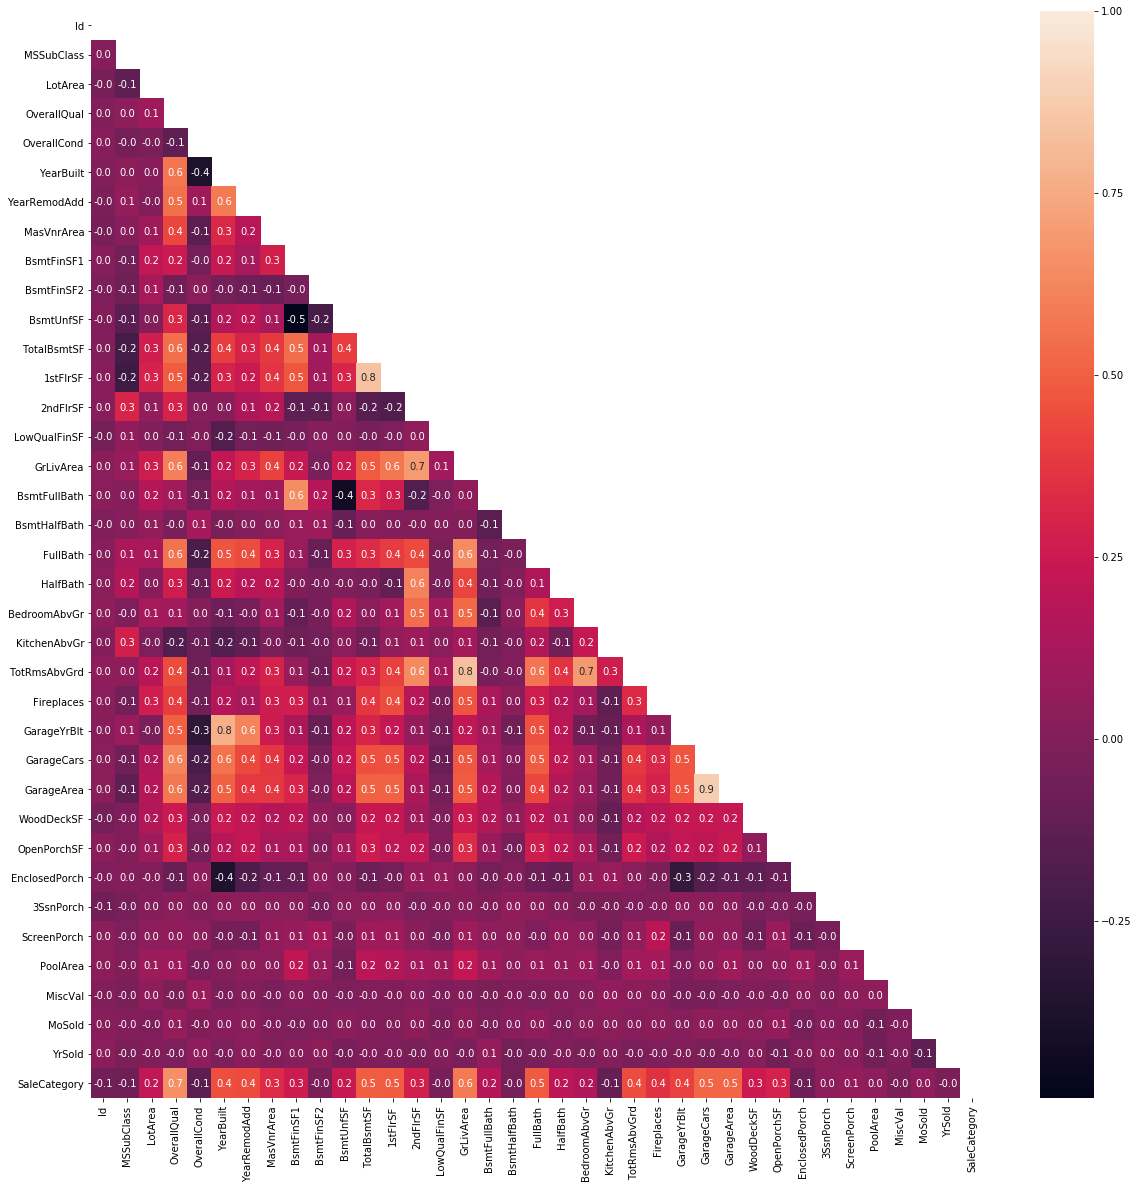

In [20]:
# Посмотрим на корреляцию признаков
corr = train_df[num_columns].corr()

plt.figure(figsize = (20,20))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".1f"
           )

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 492 to 769
Data columns (total 75 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotArea          1168 non-null int64
Street           1168 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-null object
Exterior2nd      1168 non-null object
MasVnrType       1168 non

In [22]:
train_df[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 492 to 769
Data columns (total 37 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
LotArea          1168 non-null int64
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
MasVnrArea       1168 non-null float64
BsmtFinSF1       1168 non-null int64
BsmtFinSF2       1168 non-null int64
BsmtUnfSF        1168 non-null int64
TotalBsmtSF      1168 non-null int64
1stFlrSF         1168 non-null int64
2ndFlrSF         1168 non-null int64
LowQualFinSF     1168 non-null int64
GrLivArea        1168 non-null int64
BsmtFullBath     1168 non-null int64
BsmtHalfBath     1168 non-null int64
FullBath         1168 non-null int64
HalfBath         1168 non-null int64
BedroomAbvGr     1168 non-null int64
KitchenAbvGr     1168 non-null int64
TotRmsAbvGrd     1168 non-null int64
Fireplaces       1168 non-null int64
Ga

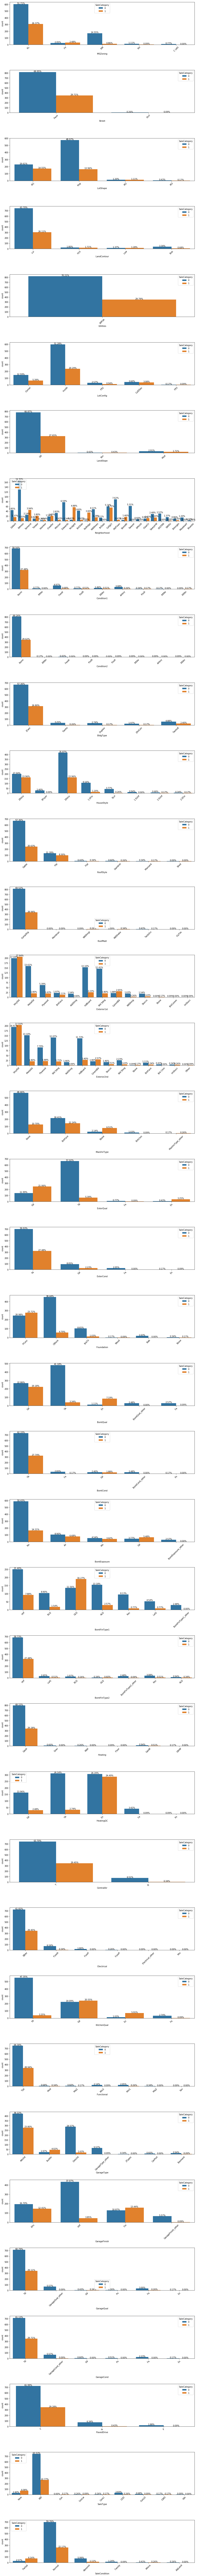

In [23]:
fig, axes = plt.subplots(ncols = 1, nrows=len(cat_columns), figsize=(16, 6*len(cat_columns)))
for i, col in enumerate(cat_columns):
    plt.setp(axes[i].get_xticklabels(), rotation=45)
    sns.countplot(x = col, hue=target, data=train_df, ax=axes[i])
    plt.subplots_adjust(hspace=0.6)
    total = len(train_df)
    for p in axes[i].patches:
        height = p.get_height()
        if pd.isna(height):
            height = 0
        axes[i].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2f}%'.format(height/total*100),
            ha="center") 

In [30]:
def get_woe(df_train, df_test, col_list, target_col):
    IV_dict = {}
    df_train = df_train.copy()
    df_test = df_test.copy()
    for col in col_list:
        all_good = len(df_train[df_train[target_col] == 1][col])
        all_bad = len(df_train[df_train[target_col] == 0][col])
        distr_good = df_train[df_train[target_col] == 1][col].value_counts()/all_good
        distr_bad = df_train[df_train[target_col] == 0][col].value_counts()/all_bad
        category_woe_dict = np.log(distr_good/distr_bad).to_dict()
        df_train[col + '_woe'] = df_train[col].map(category_woe_dict)
        df_test[col + '_woe'] = df_test[col].map(category_woe_dict)
        df_train.fillna(0, inplace=True)
        df_test.fillna(0, inplace=True)
        IV_dict[col] = ((distr_good - distr_bad)*np.log(distr_good/distr_bad)).sum()
    return df_train, df_test, IV_dict

In [31]:
train_df, test_df, IV_dict = get_woe(train_df, test_df, cat_columns, target)

In [32]:
IV_dict

{'MSZoning': 0.45889903636642493,
 'Street': 0.00019019745626966782,
 'LotShape': 0.22417885187081715,
 'LandContour': 0.06338553020381331,
 'Utilities': 0.0,
 'LotConfig': 0.040997006768022086,
 'LandSlope': 0.012941475651635777,
 'Neighborhood': 2.1986303520161865,
 'Condition1': 0.13060347339043338,
 'Condition2': 0.0014770498955329894,
 'BldgType': 0.17204645799435062,
 'HouseStyle': 0.4203409689531118,
 'RoofStyle': 0.08868176288344286,
 'RoofMatl': 0.037912946761596705,
 'Exterior1st': 0.7975243693588102,
 'Exterior2nd': 0.8134500176590003,
 'MasVnrType': 0.6799789689614117,
 'ExterQual': 2.0175045895617134,
 'ExterCond': 0.02248745987212624,
 'Foundation': 1.0737762639181954,
 'BsmtQual': 1.7020501850155827,
 'BsmtCond': 0.08710159909395285,
 'BsmtExposure': 0.3435774211158122,
 'BsmtFinType1': 0.7798824096300538,
 'BsmtFinType2': 0.17581226032985153,
 'Heating': 0.0011084754804842139,
 'HeatingQC': 0.989052018853365,
 'CentralAir': 0.17642620371580428,
 'Electrical': 0.16765975

In [33]:
useless_cols = []
for k, v in IV_dict.items():
    if v<0.02:
        useless_cols.append(k)

In [34]:
useless_cols.extend(cat_columns)

In [35]:
useless_cols

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'Heating',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [39]:
train_df.drop(useless_cols, inplace=True, errors='ignore', axis=1)
test_df.drop(useless_cols, inplace=True, errors='ignore', axis=1)

In [42]:
with pd.option_context("display.max_rows", raw_df.shape[1]):
    display(train_df.head().T)

,492,1214,762,157,1155
Id,493.000000,1215.000000,763.000000,158.000000,1156.000000
MSSubClass,60.000000,85.000000,60.000000,60.000000,20.000000
LotArea,15578.000000,10205.000000,8640.000000,12003.000000,10768.000000
OverallQual,6.000000,5.000000,7.000000,8.000000,5.000000
OverallCond,5.000000,5.000000,5.000000,5.000000,8.000000
YearBuilt,2006.000000,1962.000000,2009.000000,2009.000000,1976.000000
YearRemodAdd,2006.000000,1962.000000,2009.000000,2010.000000,2004.000000
MasVnrArea,0.000000,0.000000,0.000000,84.000000,0.000000
BsmtFinSF1,0.000000,784.000000,24.000000,0.000000,1157.000000
BsmtFinSF2,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [113]:
x_train = train_df.drop(target, axis=1)
y_train = train_df[target].copy()

x_test = test_df.drop([target], axis=1)
y_test = test_df[target].copy()

In [114]:
x_train_sc = scaler.fit_transform(x_train.astype('float64'))

In [115]:
x_test_sc = scaler.transform(x_test.astype('float64'))

In [116]:
clf = LogisticRegression(solver='liblinear')

In [117]:
clf.fit(X=x_train_sc, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
y_train_predict = clf.predict_proba(x_train_sc)[:, 1]
y_test_predict = clf.predict_proba(x_test_sc)[:, 1]

roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 5)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 5)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.98866
Test:  0.97539


In [119]:
rss = np.sum((y_train_predict - y_train) ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (train_df.shape[0] - 1 - 1)))
print("R^2:", r2_score(y_train_predict, y_train))

RSS: 42.89381420561082
RSE: 0.19179975935647864
R^2: 0.7721713077938835


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [121]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(x_train_sc, y_train)
y_train_predict = xgb.predict_proba(x_train_sc)[:, 1]
y_test_predict = xgb.predict_proba(x_test_sc)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 3)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 3)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.984


In [122]:
rss = np.sum((y_train_predict - y_train) ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (train_df.shape[0] - 1 - 1)))
print("R^2:", r2_score(y_train_predict, y_train))

RSS: 2.1151413541618456
RSE: 0.04259125360330129
R^2: 0.9906072504029622


In [123]:
from sklearn.decomposition import PCA

In [124]:
explained_variance_lst = []
pca = PCA(n_components=x_train_sc.shape[1]).fit(x_train_sc)
flag = True
for i in range(1, x_train_sc.shape[1] + 1):
    cum_percentage = sum(pca.explained_variance_ratio_[:i])
    print("n-components=%s, explained variance %.3f" % (i, cum_percentage))
    if flag and cum_percentage > 0.95:
        n_comp = i
        flag = False

n-components=1, explained variance 0.186
n-components=2, explained variance 0.240
n-components=3, explained variance 0.294
n-components=4, explained variance 0.332
n-components=5, explained variance 0.364
n-components=6, explained variance 0.392
n-components=7, explained variance 0.418
n-components=8, explained variance 0.440
n-components=9, explained variance 0.461
n-components=10, explained variance 0.481
n-components=11, explained variance 0.501
n-components=12, explained variance 0.519
n-components=13, explained variance 0.536
n-components=14, explained variance 0.552
n-components=15, explained variance 0.568
n-components=16, explained variance 0.584
n-components=17, explained variance 0.600
n-components=18, explained variance 0.615
n-components=19, explained variance 0.630
n-components=20, explained variance 0.645
n-components=21, explained variance 0.658
n-components=22, explained variance 0.672
n-components=23, explained variance 0.685
n-components=24, explained variance 0.699
n

In [125]:
n_comp

53

In [126]:
pca = PCA(n_components=n_comp).fit(x_train_sc)

In [127]:
x_train_pca = pca.transform(x_train_sc)

In [128]:
x_test_pca = pca.transform(x_test_sc)

In [129]:
clf.fit(X=x_train_pca, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
y_train_predict = clf.predict_proba(x_train_pca)[:, 1]
y_test_predict = clf.predict_proba(x_test_pca)[:, 1]

roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 5)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 5)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.98569
Test:  0.9774


In [131]:
rss = np.sum((y_train_predict - y_train) ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (train_df.shape[0] - 1 - 1)))
print("R^2:", r2_score(y_train_predict, y_train))

RSS: 48.54381512810461
RSE: 0.20404110995680583
R^2: 0.7378560093283044


In [132]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(x_train_pca, y_train)
y_train_predict = xgb.predict_proba(x_train_pca)[:, 1]
y_test_predict = xgb.predict_proba(x_test_pca)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 3)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 3)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.983


In [133]:
rss = np.sum((y_train_predict - y_train) ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (train_df.shape[0] - 1 - 1)))
print("R^2:", r2_score(y_train_predict, y_train))

RSS: 0.8720527705698079
RSE: 0.027347781910893695
R^2: 0.9961859625205116
